Import all the libraries 

In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Training

Import our Dataset 

In [583]:
filename = 'development.csv'
df_train = pd.read_csv(filename)

Display our training dataset

In [584]:
df_train

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,14.0,under $11k,0.0,44950.0,23775.2188,...,129.0,NaN,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,14.0,$25-$50k,0.0,11293.0,8076.2969,...,133.0,7.369141,NaN,NaN,NaN,NaN,NaN,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,11.0,NaN,37.0,1273347.0,633212.0000,...,143.0,7.509766,NaN,NaN,NaN,NaN,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,9.0,48671.0,31515.9844,...,137.0,7.399414,146.0,25.0,1000.0,NaN,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,8.0,$11-$25k,0.0,2958.0,1935.3555,...,137.0,7.469727,383.0,101.0,1040.0,NaN,7.0,7.00000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,71.98395,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,12.0,$11-$25k,41.0,94706.0,NaN,...,136.0,7.429688,181.0,68.0,3890.0,NaN,0.0,0.00000,1,7279
7280,68.02496,male,CHF,COPD/CHF/Cirrhosis,2,5.0,under $11k,9.0,3742.0,2707.2363,...,142.0,7.239258,527.0,44.0,360.0,NaN,2.0,2.00000,1,7280
7281,56.31198,male,Cirrhosis,COPD/CHF/Cirrhosis,1,12.0,>$50k,9.0,46602.0,30916.0000,...,139.0,NaN,75.0,12.0,980.0,NaN,0.0,0.00000,1,7281
7282,66.04498,male,Lung Cancer,Cancer,1,13.0,>$50k,0.0,11532.0,4416.3945,...,135.0,NaN,NaN,15.0,5250.0,1.0,0.0,0.00000,1,7282


Statistical Information About Our Training Dataset

In [585]:
# Display basic information about the dataset
print(df_train.info())

# Display basic statistics of the dataset
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7284 non-null   float64
 1   sex       7284 non-null   object 
 2   dzgroup   7284 non-null   object 
 3   dzclass   7284 non-null   object 
 4   num.co    7284 non-null   int64  
 5   edu       5969 non-null   float64
 6   income    4865 non-null   object 
 7   scoma     7283 non-null   float64
 8   charges   7156 non-null   float64
 9   totcst    6575 non-null   float64
 10  totmcst   4506 non-null   float64
 11  avtisst   7218 non-null   float64
 12  race      7251 non-null   object 
 13  sps       7283 non-null   float64
 14  aps       7283 non-null   float64
 15  surv2m    7283 non-null   float64
 16  surv6m    7283 non-null   float64
 17  hday      7284 non-null   int64  
 18  diabetes  7284 non-null   int64  
 19  dementia  7284 non-null   int64  
 20  ca        7284 non-null   obje

# Data Preprocessing :
1. Check for duplicates
2. Handle missing values
3. Perform encloding on Categoricaly attributes 

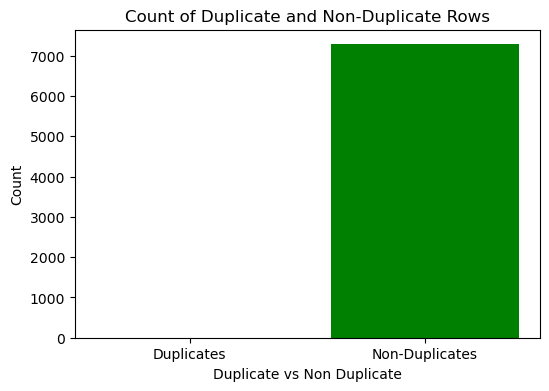

In [586]:
# Duplicates check 
duplicate_rows = df_train[df_train.duplicated()]
# print(f'number of duplicate rows:{duplicate_rows.shape[0]}')  # 0 duplicates
num_duplicates = duplicate_rows.shape[0]


# Plotting the count of duplicate rows
plt.figure(figsize=(6, 4))
plt.bar(['Duplicates', 'Non-Duplicates'], [num_duplicates, df_train.shape[0] - num_duplicates], color=['red', 'green'])
plt.xlabel('Duplicate vs Non Duplicate')
plt.ylabel('Count')
plt.title('Count of Duplicate and Non-Duplicate Rows')
plt.savefig(r'C:\Users\Sahil\Desktop\Project\duplicate_plot.png')
plt.show()

Drop the education column 

In [587]:
df_train = df_train.drop(columns=['edu'])

In [588]:
df_train

,age,sex,dzgroup,dzclass,num.co,income,scoma,charges,totcst,totmcst,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,under $11k,0.0,44950.0,23775.2188,24613.29690,...,129.0,NaN,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,$25-$50k,0.0,11293.0,8076.2969,7590.22656,...,133.0,7.369141,NaN,NaN,NaN,NaN,NaN,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,37.0,1273347.0,633212.0000,NaN,...,143.0,7.509766,NaN,NaN,NaN,NaN,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,$11-$25k,9.0,48671.0,31515.9844,33310.15620,...,137.0,7.399414,146.0,25.0,1000.0,NaN,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,$11-$25k,0.0,2958.0,1935.3555,1559.00000,...,137.0,7.469727,383.0,101.0,1040.0,NaN,7.0,7.00000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,71.98395,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,$11-$25k,41.0,94706.0,NaN,NaN,...,136.0,7.429688,181.0,68.0,3890.0,NaN,0.0,0.00000,1,7279
7280,68.02496,male,CHF,COPD/CHF/Cirrhosis,2,under $11k,9.0,3742.0,2707.2363,2761.00000,...,142.0,7.239258,527.0,44.0,360.0,NaN,2.0,2.00000,1,7280
7281,56.31198,male,Cirrhosis,COPD/CHF/Cirrhosis,1,>$50k,9.0,46602.0,30916.0000,26684.00000,...,139.0,NaN,75.0,12.0,980.0,NaN,0.0,0.00000,1,7281
7282,66.04498,male,Lung Cancer,Cancer,1,>$50k,0.0,11532.0,4416.3945,4909.53906,...,135.0,NaN,NaN,15.0,5250.0,1.0,0.0,0.00000,1,7282


Check Missing Values 

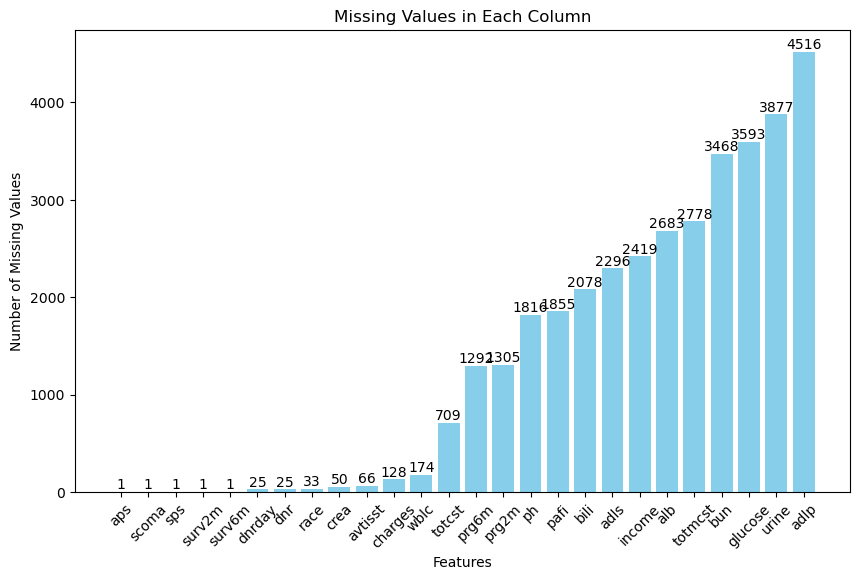

In [589]:
# check for missing values
null_values = df_train.isnull().sum()

# Filter columns with missing values
null_values = null_values[null_values > 0]

null_values = null_values.sort_values(ascending=True)

# Plot all the missing values 
plt.figure(figsize=(10, 6))
bars = plt.bar(null_values.index, null_values.values, color='skyblue')

# Adding labels with exact number of missing values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45)
plt.savefig(r'C:\Users\Sahil\Desktop\Project\missing_values_train.png')
plt.show()

Handle Missing Values

In [590]:
# Handle missing values
col_with_one_missing = ['scoma', 'sps', 'aps', 'surv2m', 'surv6m']

# Drop rows with missing values in the specified columns
df_train_clean = df_train.dropna(subset=col_with_one_missing)

# handling missing values for race
mode_race = df_train_clean['race'].mode()[0]
df_train_clean['race'].fillna(mode_race, inplace=True)
#print('number of missing values in race  now :', df_train_clean['race'].isnull().sum()) 


# Handle the missing value for income
mode_income = df_train_clean['income'].mode()[0]
df_train_clean['income'].fillna(mode_income, inplace=True)


# Calculate the median of prg6m and prg2m

median_prg6m = df_train_clean['prg6m'].median()
median_prg2m = df_train_clean['prg2m'].median()

# Fill missing values with the respective medians

df_train_clean['prg6m'].fillna(median_prg6m, inplace=True)
df_train_clean['prg2m'].fillna(median_prg2m, inplace=True)


df_train_clean[['wblc', 'charges', 'totcst', 'totmcst', 'avtisst']] = df_train_clean[['wblc', 'charges', 'totcst', 'totmcst', 'avtisst']].apply(lambda x: x.fillna(x.median()))

# Handle missing values for 'dnr' with the mode
df_train_clean['dnr'] = df_train_clean['dnr'].fillna( df_train_clean['dnr'].mode()[0])

# Handle missing values for 'dnrday' with the median
df_train_clean['dnrday'] = df_train_clean['dnrday'].fillna(df_train_clean['dnrday'].median())

# Handle other missing values
df_train_clean[['pafi', 'alb', 'bili', 'crea', 'urine']] = df_train_clean[['pafi', 'alb', 'bili', 'crea', 'urine']].apply(lambda x: x.fillna(x.median()))

df_train_clean[['adls', 'adlsc', 'adlp', 'bun', 'glucose', 'ph']] = df_train_clean[['adls', 'adlsc', 'adlp', 'bun', 'glucose', 'ph']].apply(lambda x: x.fillna(x.median()))



C:\Users\Sahil\AppData\Local\Temp\ipykernel_13720\4077120733.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['race'].fillna(mode_race, inplace=True)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_13720\4077120733.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['income'].fillna(mode_income, inplace=True)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_13720\4077120733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [591]:
df_train_clean

,age,sex,dzgroup,dzclass,num.co,income,scoma,charges,totcst,totmcst,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,under $11k,0.0,44950.0,23775.2188,24613.29690,...,129.0,7.419922,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,$25-$50k,0.0,11293.0,8076.2969,7590.22656,...,133.0,7.369141,134.0,23.0,1950.0,0.0,1.0,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,under $11k,37.0,1273347.0,633212.0000,13431.00000,...,143.0,7.509766,134.0,23.0,1950.0,0.0,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,$11-$25k,9.0,48671.0,31515.9844,33310.15620,...,137.0,7.399414,146.0,25.0,1000.0,0.0,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,$11-$25k,0.0,2958.0,1935.3555,1559.00000,...,137.0,7.469727,383.0,101.0,1040.0,0.0,7.0,7.00000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,71.98395,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,$11-$25k,41.0,94706.0,14531.3438,13431.00000,...,136.0,7.429688,181.0,68.0,3890.0,0.0,0.0,0.00000,1,7279
7280,68.02496,male,CHF,COPD/CHF/Cirrhosis,2,under $11k,9.0,3742.0,2707.2363,2761.00000,...,142.0,7.239258,527.0,44.0,360.0,0.0,2.0,2.00000,1,7280
7281,56.31198,male,Cirrhosis,COPD/CHF/Cirrhosis,1,>$50k,9.0,46602.0,30916.0000,26684.00000,...,139.0,7.419922,75.0,12.0,980.0,0.0,0.0,0.00000,1,7281
7282,66.04498,male,Lung Cancer,Cancer,1,>$50k,0.0,11532.0,4416.3945,4909.53906,...,135.0,7.419922,134.0,15.0,5250.0,1.0,0.0,0.00000,1,7282


In [592]:
null_values_new = df_train_clean.isnull().sum()
print(null_values_new)

age         0
sex         0
dzgroup     0
dzclass     0
num.co      0
income      0
scoma       0
charges     0
totcst      0
totmcst     0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adls        0
adlsc       0
death       0
Id          0
dtype: int64


In [593]:
# Perform encoding on all the categorical data 
# Selecting categorical columns
categorical_columns = df_train_clean.select_dtypes(include=['object', 'category'])

print("Categorical Columns:")
print(categorical_columns.columns.tolist())

Categorical Columns:
['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr']


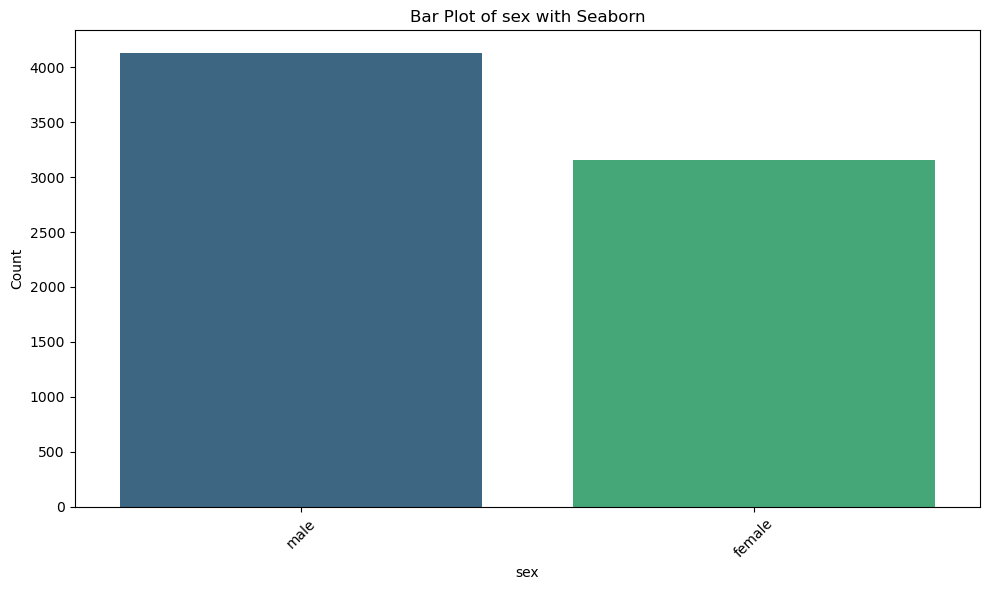

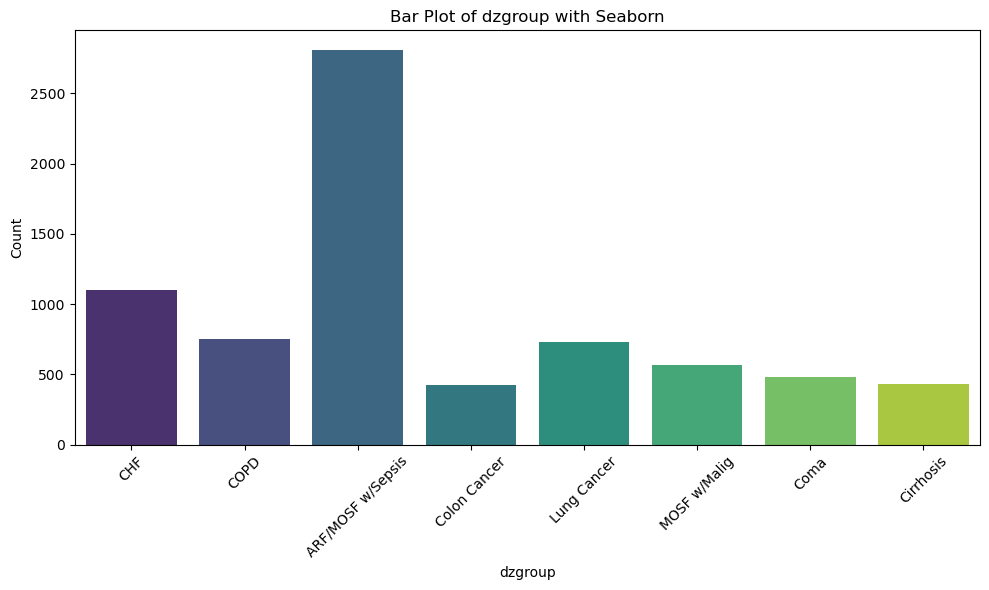

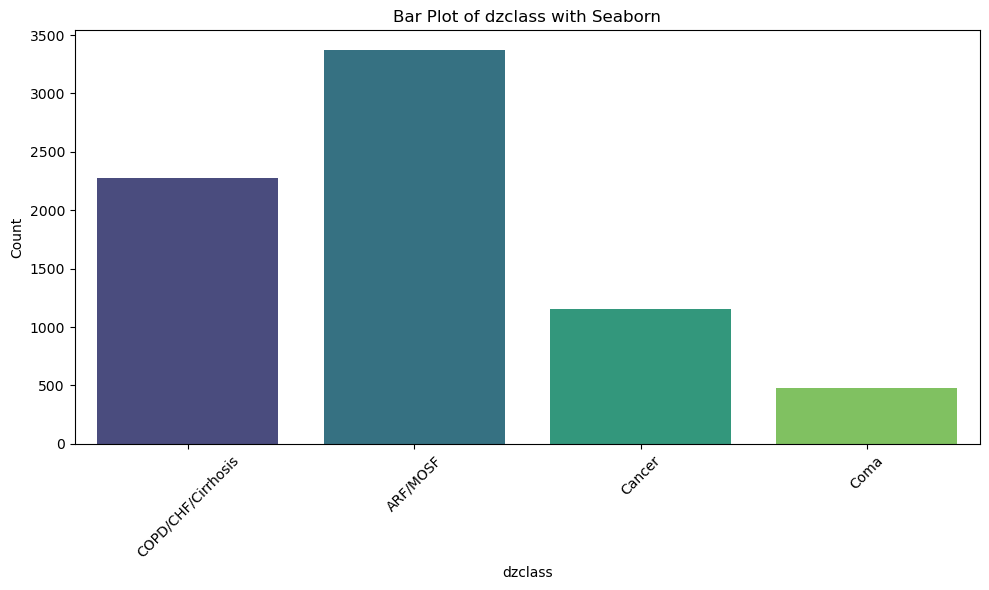

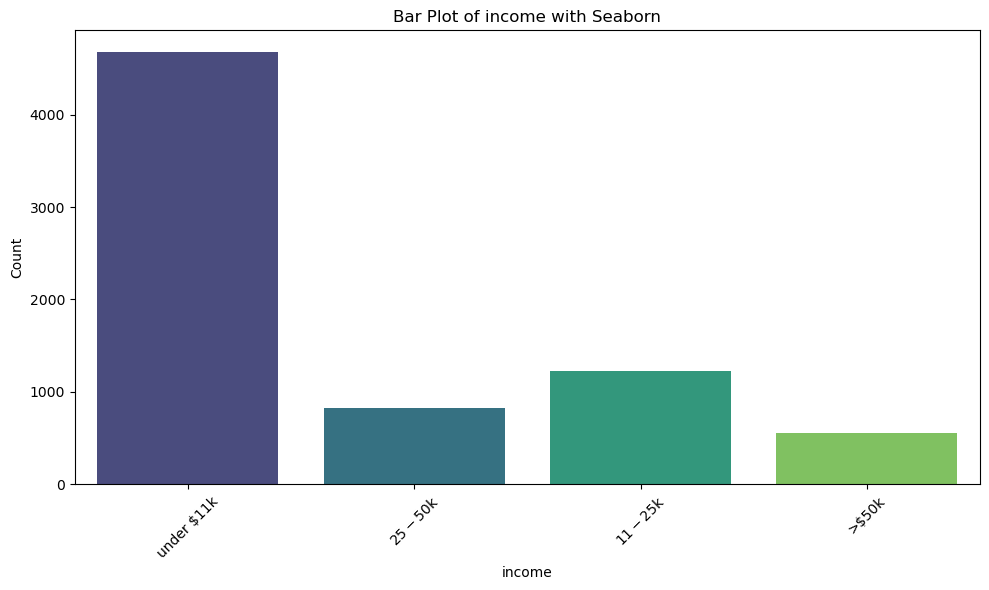

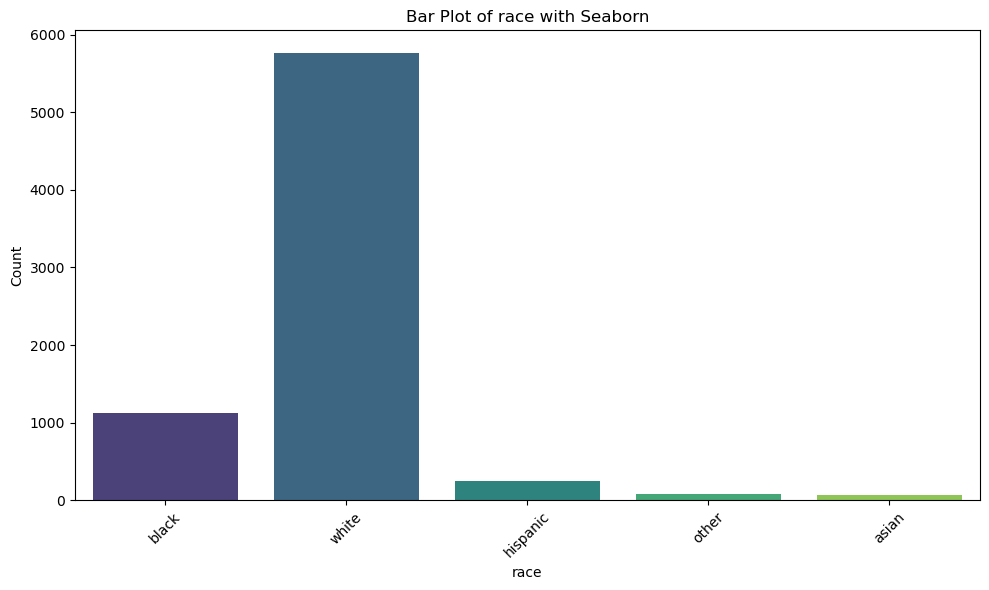

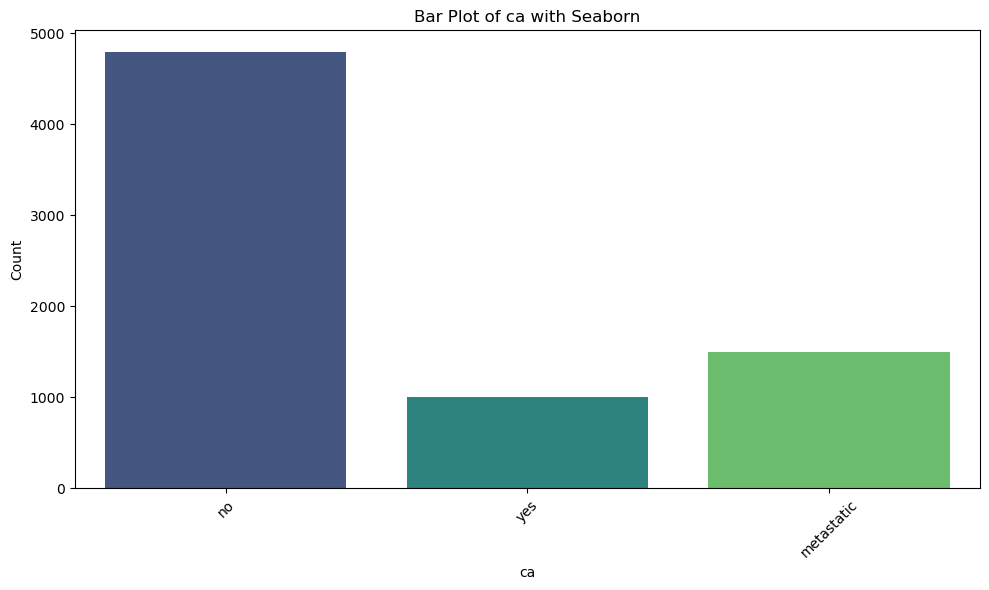

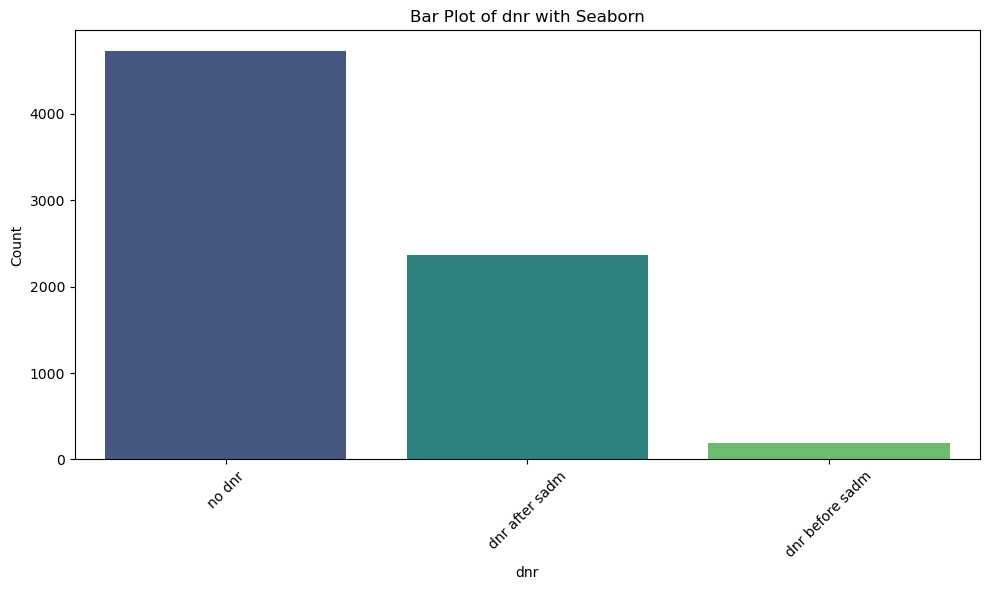

In [594]:
 # Using seaborn
for column in categorical_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_train_clean, palette='viridis')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {column} with Seaborn')
    plt.xticks(rotation=45)  # Rotate category labels if needed
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

Peform Encoding On The Categorical 

In [595]:
#  the specified columns
columns_to_encode = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr']

# Create the OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(df_train_clean[columns_to_encode])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop the original columns and concatenate the new encoded columns
df_train_clean = df_train_clean.drop(columns=columns_to_encode).reset_index(drop=True)

last_two_columns = df_train_clean.iloc[:, -2:]
remaining_coloumns= df_train_clean.iloc[:, :-2]

df_train_clean_encoded = pd.concat([remaining_coloumns ,encoded_df,last_two_columns  ], axis=1)

In [596]:
df_train_clean_encoded

,age,num.co,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,...,race_black,race_hispanic,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr,death,Id
0,44.32599,2,0.0,44950.0,23775.2188,24613.29690,14.333328,32.398438,40.0,0.772949,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
1,78.39600,2,0.0,11293.0,8076.2969,7590.22656,15.500000,18.898438,43.0,0.763916,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
2,32.44098,1,37.0,1273347.0,633212.0000,13431.00000,38.500000,32.296875,44.0,0.569946,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,2
3,74.93994,0,9.0,48671.0,31515.9844,33310.15620,24.500000,25.398438,35.0,0.647949,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,3
4,61.67599,1,0.0,2958.0,1935.3555,1559.00000,15.000000,34.398438,44.0,0.447998,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,71.98395,0,41.0,94706.0,14531.3438,13431.00000,39.500000,44.195312,89.0,0.051994,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,7279
7279,68.02496,2,9.0,3742.0,2707.2363,2761.00000,8.000000,31.500000,45.0,0.630981,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,7280
7280,56.31198,1,9.0,46602.0,30916.0000,26684.00000,18.000000,22.398438,28.0,0.747925,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,7281
7281,66.04498,1,0.0,11532.0,4416.3945,4909.53906,13.000000,16.398438,12.0,0.717896,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,7282


# Model Training

In [597]:
# Define the classification models
classification_models = {
    'SVM': SVC(C=1.0, kernel= 'linear', degree=3, gamma='auto', coef0=0.0, shrinking=True,
               probability= False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
               max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None),

    'KNN': KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None),

    'RandomForest': RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None,
                                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                           max_features= 'sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                           bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
                                           verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
                                           max_samples=None), 

    'DecisionTree': DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10,
                                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                           max_features=None, random_state=None, max_leaf_nodes=None,
                                           min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
}

In [598]:
# Features and Target 
X = df_train_clean_encoded.iloc[:, :-2]
y = df_train_clean_encoded.iloc[:, -2]

In [599]:
# Features
X

,age,num.co,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,...,income_>$50k,income_under $11k,race_black,race_hispanic,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr
0,44.32599,2,0.0,44950.0,23775.2188,24613.29690,14.333328,32.398438,40.0,0.772949,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,78.39600,2,0.0,11293.0,8076.2969,7590.22656,15.500000,18.898438,43.0,0.763916,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,32.44098,1,37.0,1273347.0,633212.0000,13431.00000,38.500000,32.296875,44.0,0.569946,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,74.93994,0,9.0,48671.0,31515.9844,33310.15620,24.500000,25.398438,35.0,0.647949,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,61.67599,1,0.0,2958.0,1935.3555,1559.00000,15.000000,34.398438,44.0,0.447998,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,71.98395,0,41.0,94706.0,14531.3438,13431.00000,39.500000,44.195312,89.0,0.051994,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7279,68.02496,2,9.0,3742.0,2707.2363,2761.00000,8.000000,31.500000,45.0,0.630981,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7280,56.31198,1,9.0,46602.0,30916.0000,26684.00000,18.000000,22.398438,28.0,0.747925,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7281,66.04498,1,0.0,11532.0,4416.3945,4909.53906,13.000000,16.398438,12.0,0.717896,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [600]:
# Target
y

0       1
1       1
2       1
3       0
4       1
       ..
7278    1
7279    1
7280    1
7281    1
7282    1
Name: death, Length: 7283, dtype: int64

In [601]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [602]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [603]:
# Apply PCA to the scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

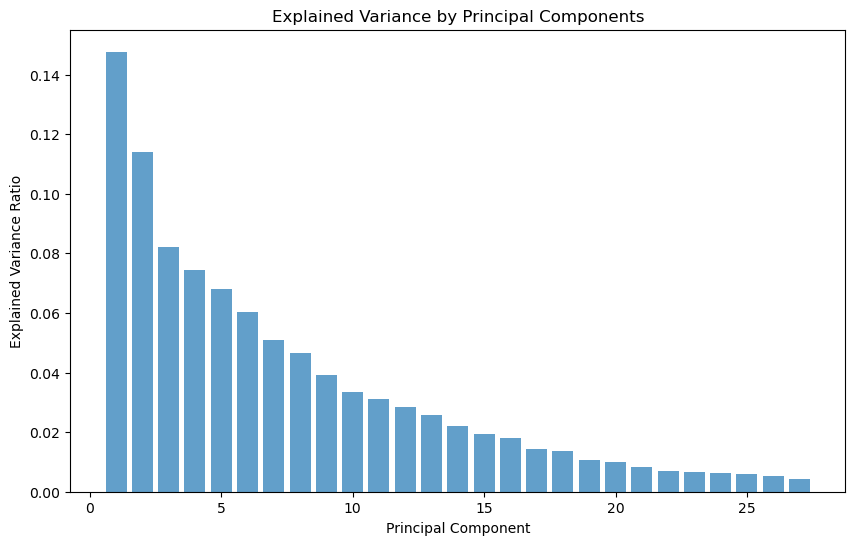

In [604]:
explained_variance_ratio = pca.explained_variance_ratio_

# Bar plot of explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.savefig(r'C:\Users\Sahil\Desktop\Project\PCA.png')
plt.show()



In [605]:
# Train and evaluate each model
for name, model in classification_models.items():
    # Train the model
    model.fit(X_train_pca, y_train)
   
    # Predict on the test set
    y_pred = model.predict(X_test_pca)
   
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
   
    print(f'{name} Model F1 Score: {f1:.4f}')

SVM Model F1 Score: 0.8443
KNN Model F1 Score: 0.8260
RandomForest Model F1 Score: 0.8361
DecisionTree Model F1 Score: 0.8097


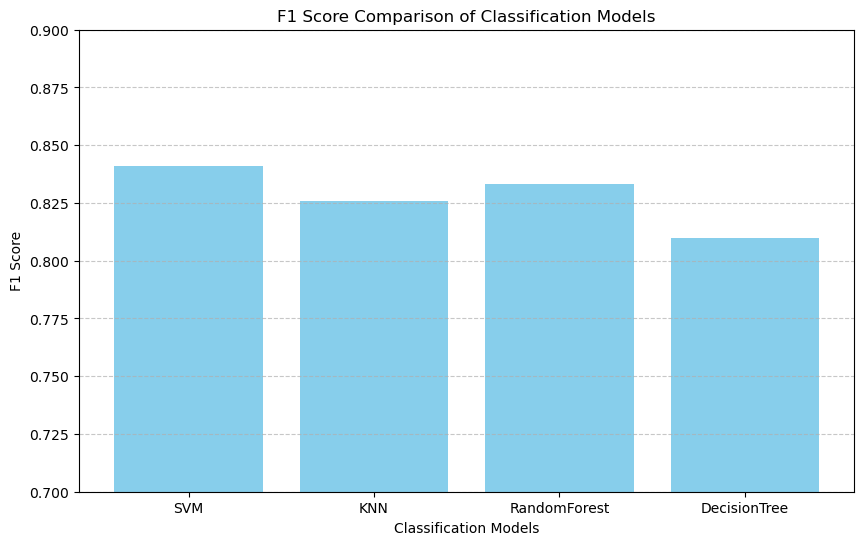

In [606]:
import matplotlib.pyplot as plt

# Model names and corresponding F1 scores
models = ['SVM', 'KNN', 'RandomForest', 'DecisionTree']
f1_scores = [0.8410, 0.8260, 0.8332, 0.8099]

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Classification Models')
plt.ylim(0.7, 0.9)  # Adjust ylim based on your F1 score range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(r'C:\Users\Sahil\Desktop\Project\F1.png')
plt.show()  



# Evaluation 

In [607]:
filename = 'evaluation.csv'
df_test = pd.read_csv(filename)

In [608]:
df_test

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,Id
0,75.70197,male,COPD,COPD/CHF/Cirrhosis,3,15.0,$11-$25k,0.0,8417.000,5477.2930,...,1.299805,136.0,7.349609,175.0,42.0,1100.0,3.0,2.0,2.000000,0
1,44.61600,male,CHF,COPD/CHF/Cirrhosis,2,16.0,under $11k,0.0,71501.000,34153.9062,...,1.099854,126.0,NaN,106.0,19.0,2625.0,4.0,5.0,5.000000,1
2,66.43396,male,ARF/MOSF w/Sepsis,ARF/MOSF,4,NaN,under $11k,0.0,18040.000,11452.9219,...,1.399902,139.0,7.389648,NaN,NaN,NaN,NaN,NaN,3.207520,2
3,50.97897,male,CHF,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,0.0,20779.000,12855.9375,...,0.599976,133.0,7.449219,160.0,17.0,2065.0,0.0,2.0,2.000000,3
4,49.54999,female,Lung Cancer,Cancer,1,12.0,under $11k,0.0,11291.000,8300.6562,...,0.899902,139.0,NaN,88.0,12.0,NaN,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,73.90295,male,CHF,COPD/CHF/Cirrhosis,2,16.0,NaN,0.0,6676.000,4164.0781,...,1.500000,137.0,NaN,NaN,NaN,NaN,NaN,NaN,2.252441,1816
1817,67.34595,female,Coma,Coma,0,11.0,under $11k,94.0,67080.000,44024.9062,...,1.299805,143.0,7.459961,74.0,26.0,1100.0,NaN,1.0,1.000000,1817
1818,57.06998,female,Lung Cancer,Cancer,1,12.0,$25-$50k,0.0,40442.000,NaN,...,6.199219,139.0,7.369141,158.0,101.0,960.0,0.0,0.0,0.000000,1818
1819,63.89899,female,ARF/MOSF w/Sepsis,ARF/MOSF,2,4.0,under $11k,0.0,68388.125,44266.1875,...,2.299805,129.0,7.469727,NaN,NaN,NaN,NaN,0.0,0.000000,1819


In [609]:
# Display basic information about the dataset
print(df_test.info())

# Display basic statistics of the dataset
print(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1821 non-null   float64
 1   sex       1821 non-null   object 
 2   dzgroup   1821 non-null   object 
 3   dzclass   1821 non-null   object 
 4   num.co    1821 non-null   int64  
 5   edu       1502 non-null   float64
 6   income    1258 non-null   object 
 7   scoma     1821 non-null   float64
 8   charges   1777 non-null   float64
 9   totcst    1642 non-null   float64
 10  totmcst   1124 non-null   float64
 11  avtisst   1805 non-null   float64
 12  race      1812 non-null   object 
 13  sps       1821 non-null   float64
 14  aps       1821 non-null   float64
 15  surv2m    1821 non-null   float64
 16  surv6m    1821 non-null   float64
 17  hday      1821 non-null   int64  
 18  diabetes  1821 non-null   int64  
 19  dementia  1821 non-null   int64  
 20  ca        1821 non-null   obje

Drop the education columns 

In [610]:
df_test = df_test.drop(columns=['edu'])

In [611]:
df_test

,age,sex,dzgroup,dzclass,num.co,income,scoma,charges,totcst,totmcst,...,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,Id
0,75.70197,male,COPD,COPD/CHF/Cirrhosis,3,$11-$25k,0.0,8417.000,5477.2930,5899.47656,...,1.299805,136.0,7.349609,175.0,42.0,1100.0,3.0,2.0,2.000000,0
1,44.61600,male,CHF,COPD/CHF/Cirrhosis,2,under $11k,0.0,71501.000,34153.9062,38849.93750,...,1.099854,126.0,NaN,106.0,19.0,2625.0,4.0,5.0,5.000000,1
2,66.43396,male,ARF/MOSF w/Sepsis,ARF/MOSF,4,under $11k,0.0,18040.000,11452.9219,12571.50780,...,1.399902,139.0,7.389648,NaN,NaN,NaN,NaN,NaN,3.207520,2
3,50.97897,male,CHF,COPD/CHF/Cirrhosis,2,$11-$25k,0.0,20779.000,12855.9375,12840.00000,...,0.599976,133.0,7.449219,160.0,17.0,2065.0,0.0,2.0,2.000000,3
4,49.54999,female,Lung Cancer,Cancer,1,under $11k,0.0,11291.000,8300.6562,9814.00000,...,0.899902,139.0,NaN,88.0,12.0,NaN,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,73.90295,male,CHF,COPD/CHF/Cirrhosis,2,NaN,0.0,6676.000,4164.0781,NaN,...,1.500000,137.0,NaN,NaN,NaN,NaN,NaN,NaN,2.252441,1816
1817,67.34595,female,Coma,Coma,0,under $11k,94.0,67080.000,44024.9062,50170.71880,...,1.299805,143.0,7.459961,74.0,26.0,1100.0,NaN,1.0,1.000000,1817
1818,57.06998,female,Lung Cancer,Cancer,1,$25-$50k,0.0,40442.000,NaN,NaN,...,6.199219,139.0,7.369141,158.0,101.0,960.0,0.0,0.0,0.000000,1818
1819,63.89899,female,ARF/MOSF w/Sepsis,ARF/MOSF,2,under $11k,0.0,68388.125,44266.1875,NaN,...,2.299805,129.0,7.469727,NaN,NaN,NaN,NaN,0.0,0.000000,1819


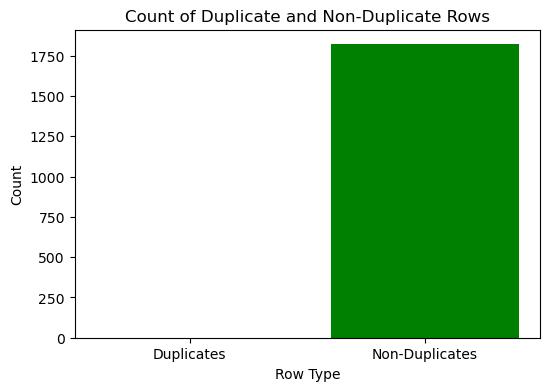

In [612]:
# Duplicates check 
duplicate_rows = df_test[df_test.duplicated()]
# print(f'number of duplicate rows:{duplicate_rows.shape[0]}')  # 0 duplicates
num_duplicates = duplicate_rows.shape[0]


# Plotting the count of duplicate rows
plt.figure(figsize=(6, 4))
plt.bar(['Duplicates', 'Non-Duplicates'], [num_duplicates, df_test.shape[0] - num_duplicates], color=['red', 'green'])
plt.xlabel('Row Type')
plt.ylabel('Count')
plt.title('Count of Duplicate and Non-Duplicate Rows')
plt.show()

Missing Values

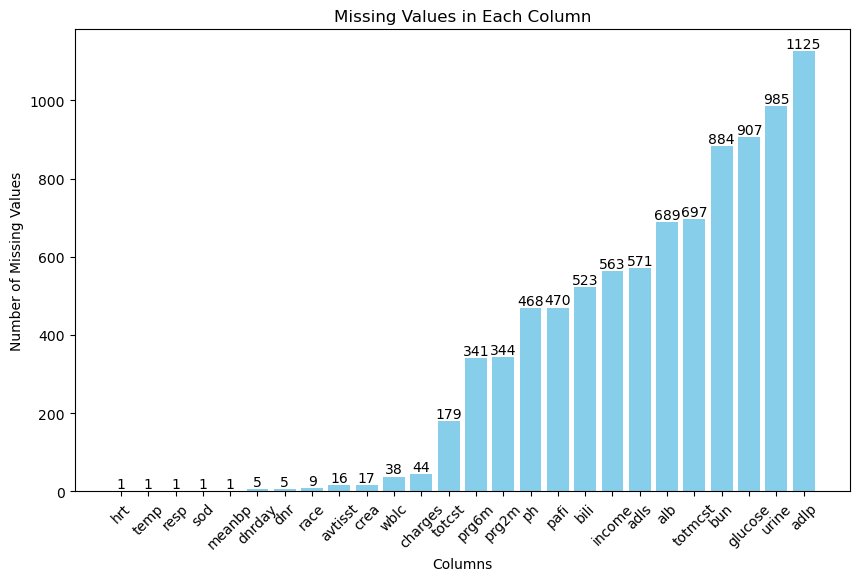

In [613]:
# check for missing values
null_values = df_test.isnull().sum()

# Filter columns with missing values
null_values = null_values[null_values > 0]
null_values = null_values.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(null_values.index, null_values.values, color='skyblue')

# Adding labels with exact number of missing values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

Handle missing values

In [614]:
# List of columns with one missing value
col_with_one_missing = ['sod', 'meanbp', 'hrt', 'resp', 'temp']

# Replace NaN values with the mode for the specified columns
for col in col_with_one_missing:
    mode_value = df_test[col].mode()[0]  # Get the mode of the column
    df_test[col].fillna(mode_value, inplace=True)
    df_test_clean = df_test.copy()

# handling missing values for race
mode_race = df_test_clean['race'].mode()[0]
df_test_clean['race'].fillna(mode_race, inplace=True)
#print('number of missing values in race  now :', df_test_clean['race'].isnull().sum()) 


# Handle the missing value for income
mode_income = df_test_clean['income'].mode()[0]
df_test_clean['income'].fillna(mode_income, inplace=True)


# Calculate the median of prg6m and prg2m

median_prg6m = df_test_clean['prg6m'].median()
median_prg2m = df_test_clean['prg2m'].median()

# Fill missing values with the respective medians

df_test_clean['prg6m'].fillna(median_prg6m, inplace=True)
df_test_clean['prg2m'].fillna(median_prg2m, inplace=True)


df_test_clean[['wblc', 'charges', 'totcst', 'totmcst', 'avtisst']] = df_test_clean[['wblc', 'charges', 'totcst', 'totmcst', 'avtisst']].apply(lambda x: x.fillna(x.median()))

# Handle missing values for 'dnr' with the mode
df_test_clean['dnr'] = df_test_clean['dnr'].fillna( df_test_clean['dnr'].mode()[0])

# Handle missing values for 'dnrday' with the median
df_test_clean['dnrday'] = df_test_clean['dnrday'].fillna(df_test_clean['dnrday'].median())

# Handle other missing values
df_test_clean[['pafi', 'alb', 'bili', 'crea', 'urine']] = df_test_clean[['pafi', 'alb', 'bili', 'crea', 'urine']].apply(lambda x: x.fillna(x.median()))

df_test_clean[['adls', 'adlp', 'bun', 'glucose', 'ph']] = df_test_clean[['adls', 'adlp', 'bun', 'glucose', 'ph']].apply(lambda x: x.fillna(x.median()))


In [615]:
df_test_clean

,age,sex,dzgroup,dzclass,num.co,income,scoma,charges,totcst,totmcst,...,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,Id
0,75.70197,male,COPD,COPD/CHF/Cirrhosis,3,$11-$25k,0.0,8417.000,5477.2930,5899.47656,...,1.299805,136.0,7.349609,175.0,42.0,1100.0,3.0,2.0,2.000000,0
1,44.61600,male,CHF,COPD/CHF/Cirrhosis,2,under $11k,0.0,71501.000,34153.9062,38849.93750,...,1.099854,126.0,7.429688,106.0,19.0,2625.0,4.0,5.0,5.000000,1
2,66.43396,male,ARF/MOSF w/Sepsis,ARF/MOSF,4,under $11k,0.0,18040.000,11452.9219,12571.50780,...,1.399902,139.0,7.389648,137.0,23.0,2000.0,0.0,0.0,3.207520,2
3,50.97897,male,CHF,COPD/CHF/Cirrhosis,2,$11-$25k,0.0,20779.000,12855.9375,12840.00000,...,0.599976,133.0,7.449219,160.0,17.0,2065.0,0.0,2.0,2.000000,3
4,49.54999,female,Lung Cancer,Cancer,1,under $11k,0.0,11291.000,8300.6562,9814.00000,...,0.899902,139.0,7.429688,88.0,12.0,2000.0,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,73.90295,male,CHF,COPD/CHF/Cirrhosis,2,under $11k,0.0,6676.000,4164.0781,12623.10550,...,1.500000,137.0,7.429688,137.0,23.0,2000.0,0.0,0.0,2.252441,1816
1817,67.34595,female,Coma,Coma,0,under $11k,94.0,67080.000,44024.9062,50170.71880,...,1.299805,143.0,7.459961,74.0,26.0,1100.0,0.0,1.0,1.000000,1817
1818,57.06998,female,Lung Cancer,Cancer,1,$25-$50k,0.0,40442.000,14017.1328,12623.10550,...,6.199219,139.0,7.369141,158.0,101.0,960.0,0.0,0.0,0.000000,1818
1819,63.89899,female,ARF/MOSF w/Sepsis,ARF/MOSF,2,under $11k,0.0,68388.125,44266.1875,12623.10550,...,2.299805,129.0,7.469727,137.0,23.0,2000.0,0.0,0.0,0.000000,1819


In [616]:
null_values_test = df_test_clean.isnull().sum()
print(null_values_test)

age         0
sex         0
dzgroup     0
dzclass     0
num.co      0
income      0
scoma       0
charges     0
totcst      0
totmcst     0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adls        0
adlsc       0
Id          0
dtype: int64


Perform encoding on all the categorical data 

In [617]:
# Selecting categorical columns
categorical_columns = df_test_clean.select_dtypes(include=['object', 'category'])

print("Categorical Columns:")
print(categorical_columns.columns.tolist())

Categorical Columns:
['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr']


In [618]:
# Transform the specified columns in the test data
encoded_test_columns = encoder.transform(df_test_clean[columns_to_encode])

# Create a DataFrame with the encoded columns for the test data
encoded_test_df = pd.DataFrame(encoded_test_columns, columns=encoder.get_feature_names_out(columns_to_encode))

In [619]:
encoded_test_df

,sex_male,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,...,income_>$50k,income_under $11k,race_black,race_hispanic,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1817,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1818,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [620]:
# Drop the original columns and concatenate the new encoded columns in the test data
df_test_clean = df_test_clean.drop(columns=columns_to_encode).reset_index(drop=True)

last_one_columns = df_test_clean.iloc[:, -1:] # id 
remaining_coloumns= df_test_clean.iloc[:, :-1]
df_test_clean_encoded = pd.concat([remaining_coloumns , encoded_test_df , last_one_columns], axis=1)

In [621]:
df_test_clean_encoded

,age,num.co,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,...,income_under $11k,race_black,race_hispanic,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr,Id
0,75.70197,3,0.0,8417.000,5477.2930,5899.47656,10.000000,14.500000,26.0,0.873901,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,44.61600,2,0.0,71501.000,34153.9062,38849.93750,25.000000,42.093750,28.0,0.565918,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
2,66.43396,4,0.0,18040.000,11452.9219,12571.50780,28.000000,28.796875,43.0,0.722900,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2
3,50.97897,2,0.0,20779.000,12855.9375,12840.00000,14.333328,27.699219,37.0,0.814941,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3
4,49.54999,1,0.0,11291.000,8300.6562,9814.00000,6.666664,13.398438,8.0,0.799927,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,73.90295,2,0.0,6676.000,4164.0781,12623.10550,11.000000,19.199219,22.0,0.843994,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1816
1817,67.34595,0,94.0,67080.000,44024.9062,50170.71880,24.250000,19.898438,29.0,0.266968,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1817
1818,57.06998,1,0.0,40442.000,14017.1328,12623.10550,11.000000,17.398438,14.0,0.718994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1818
1819,63.89899,2,0.0,68388.125,44266.1875,12623.10550,40.000000,39.695312,61.0,0.442993,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1819


In [622]:
# Assuming X_test are the features from df_test_clean_encoded
X_evaluation = df_test_clean_encoded.iloc[:, :-1]

In [623]:
X_evaluation

,age,num.co,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,...,income_>$50k,income_under $11k,race_black,race_hispanic,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr
0,75.70197,3,0.0,8417.000,5477.2930,5899.47656,10.000000,14.500000,26.0,0.873901,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,44.61600,2,0.0,71501.000,34153.9062,38849.93750,25.000000,42.093750,28.0,0.565918,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,66.43396,4,0.0,18040.000,11452.9219,12571.50780,28.000000,28.796875,43.0,0.722900,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,50.97897,2,0.0,20779.000,12855.9375,12840.00000,14.333328,27.699219,37.0,0.814941,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,49.54999,1,0.0,11291.000,8300.6562,9814.00000,6.666664,13.398438,8.0,0.799927,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,73.90295,2,0.0,6676.000,4164.0781,12623.10550,11.000000,19.199219,22.0,0.843994,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1817,67.34595,0,94.0,67080.000,44024.9062,50170.71880,24.250000,19.898438,29.0,0.266968,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1818,57.06998,1,0.0,40442.000,14017.1328,12623.10550,11.000000,17.398438,14.0,0.718994,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1819,63.89899,2,0.0,68388.125,44266.1875,12623.10550,40.000000,39.695312,61.0,0.442993,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [624]:
# Scale the evaluation data using the same scaler fitted on training data
X_evaluation_scaled = scaler.transform(X_evaluation)

# Apply PCA to the scaled evaluation data using the same PCA fitted on training data
X_evaluation_pca = pca.transform(X_evaluation_scaled)

# Dictionary to store predictions from each model
predictions = {}

# Predict the target labels for the test set using each trained model
for name, model in classification_models.items():
    # Predict on the test set
    y_pred = model.predict(X_evaluation_pca)
    
    # Store the predictions
    predictions[name] = y_pred

    print(f'{name} Model Predictions: {y_pred}')

# If you want to save the predictions to a DataFrame or a file:
predictions_df = pd.DataFrame(predictions)
print(predictions_df)

SVM Model Predictions: [1 1 1 ... 1 1 1]
KNN Model Predictions: [1 1 1 ... 1 1 1]
RandomForest Model Predictions: [1 1 1 ... 1 1 1]
DecisionTree Model Predictions: [1 1 1 ... 1 1 1]
      SVM  KNN  RandomForest  DecisionTree
0       1    1             1             1
1       1    1             1             1
2       1    1             1             1
3       1    0             1             0
4       1    1             1             1
...   ...  ...           ...           ...
1816    1    0             1             1
1817    1    1             1             1
1818    1    1             1             1
1819    1    1             1             1
1820    1    1             1             1

[1821 rows x 4 columns]


svm

In [625]:
# Combine IDs with SVC predictions into a DataFrame
results_df = pd.DataFrame({
    'Id': df_test_clean_encoded['Id'].astype(int),
    'Predicted': predictions['SVM']  # Replace 'SVC' with the actual key for your SVC model
})

# Print the combined DataFrame
print(results_df)

        Id  Predicted
0        0          1
1        1          1
2        2          1
3        3          1
4        4          1
...    ...        ...
1816  1816          1
1817  1817          1
1818  1818          1
1819  1819          1
1820  1820          1

[1821 rows x 2 columns]


In [626]:
results_df.to_csv('model_predictions_svm_new_linear_balance.csv', index=False)

Decision Tree

In [627]:
# Combine IDs with DecisionTree  predictions into a DataFrame
results_df_1 = pd.DataFrame({
    'Id': df_test_clean_encoded['Id'].astype(int),
    'Predicted': predictions['DecisionTree']  # Replace DecisionTreeClassifier with the actual key for your DecisionTreeClassifie model
})

# Print the combined DataFrame
print(results_df_1)

        Id  Predicted
0        0          1
1        1          1
2        2          1
3        3          0
4        4          1
...    ...        ...
1816  1816          1
1817  1817          1
1818  1818          1
1819  1819          1
1820  1820          1

[1821 rows x 2 columns]


In [628]:
results_df_1.to_csv('model_predictions_decisiontree.csv', index=False)

knn

In [629]:
# Combine IDs with KNN  predictions into a DataFrame
results_df_2 = pd.DataFrame({
    'Id': df_test_clean_encoded['Id'].astype(int),
    'Predicted': predictions['KNN']  # Replace KNeighborsClassifier with the actual key for your KNeighborsClassifier model
})

# Print the combined DataFrame
print(results_df_2)

        Id  Predicted
0        0          1
1        1          1
2        2          1
3        3          0
4        4          1
...    ...        ...
1816  1816          0
1817  1817          1
1818  1818          1
1819  1819          1
1820  1820          1

[1821 rows x 2 columns]


In [630]:
results_df_2.to_csv('model_predictions_knn.csv', index=False)

Random Forest

In [631]:
# Combine IDs with  RandomForestClassifier predictions into a DataFrame
results_df_3 = pd.DataFrame({
    'Id': df_test_clean_encoded['Id'].astype(int),
    'Predicted': predictions['RandomForest']  # Replace  RandomForestClassifier with the actual key for your  RandomForestClassifier model
})

# Print the combined DataFrame
print(results_df_3)

        Id  Predicted
0        0          1
1        1          1
2        2          1
3        3          1
4        4          1
...    ...        ...
1816  1816          1
1817  1817          1
1818  1818          1
1819  1819          1
1820  1820          1

[1821 rows x 2 columns]


In [632]:
results_df_3.to_csv('model_predictions_randomforest_new_500.csv', index=False)

Conclusion : The best is shown using the SVM Model